In [1]:
## 基础函数库
import numpy as np 
import pandas as pd
## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式

In [3]:
# 利用value_counts函数查看每个类别数量
pd.Series(iris_target).value_counts()

0    50
1    50
2    50
dtype: int64

In [4]:
# 查看数据的均值、方差、最小值、最大值、四分位数
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 合并标签和特征信息
iris_all = iris_features.copy() ## 进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target

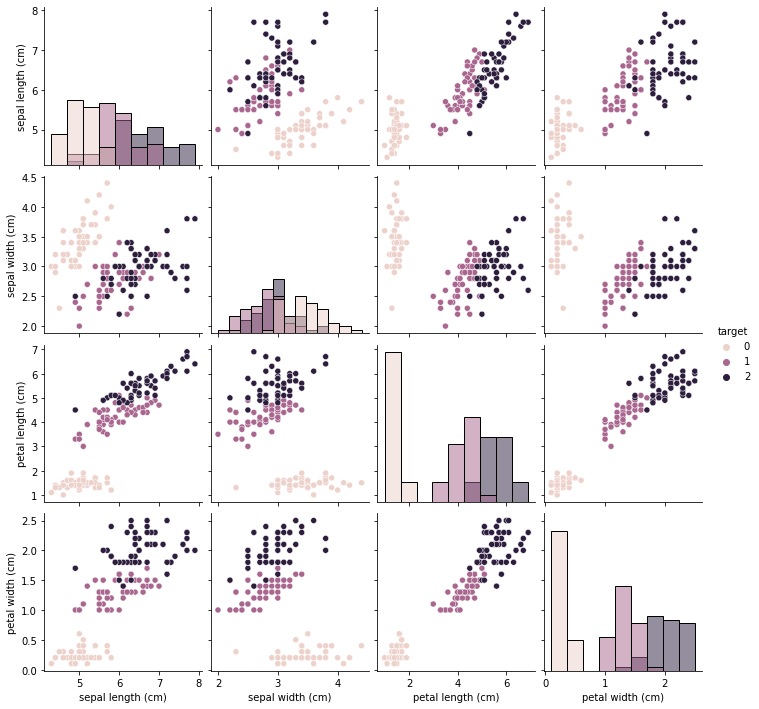

In [6]:
# 特征与标签组合的散点可视化
# 在2D情况下不同的特征组合对于不同类别的花的散点分布，以及大概的区分能力。
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')
plt.show()

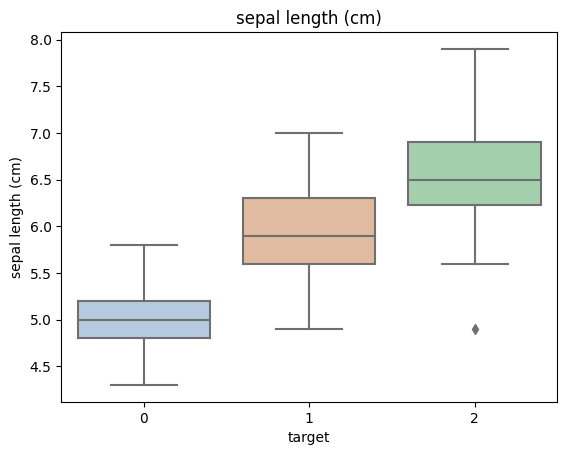

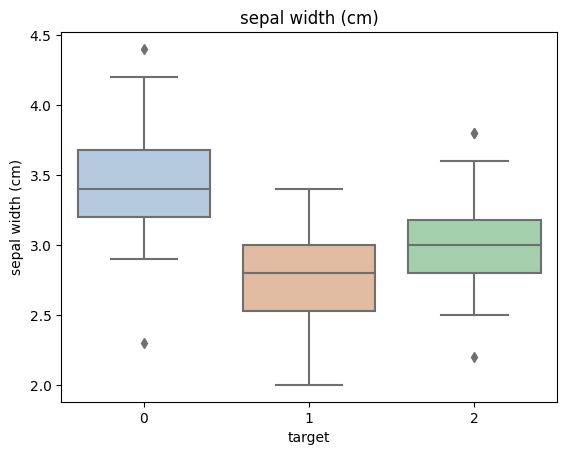

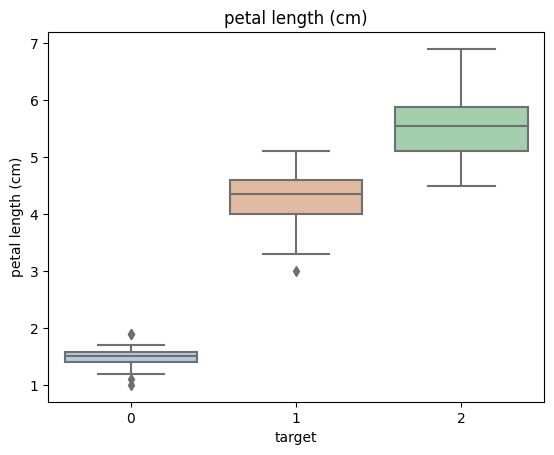

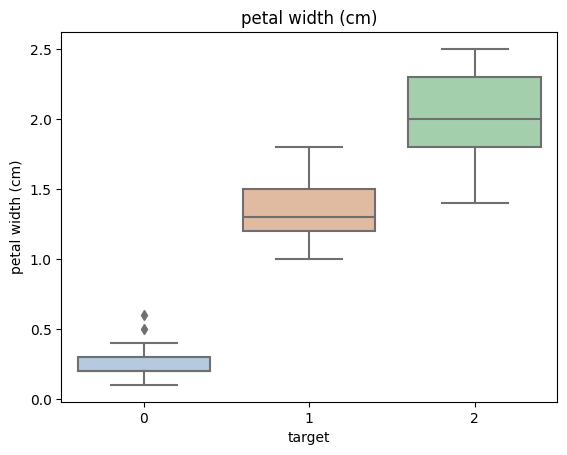

In [7]:
# 利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5, palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

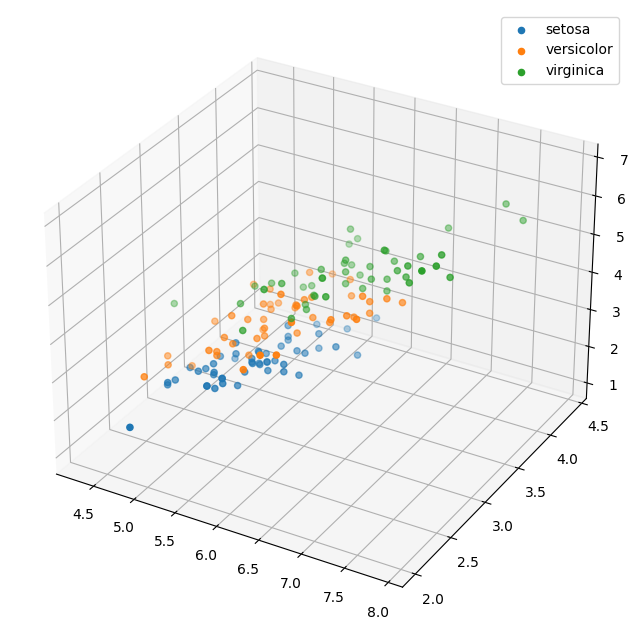

In [8]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
 
iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()
 
plt.show()

In [9]:
# 将数据划分为训练集和测试集,20%作为测试集，随机数种子
from sklearn.model_selection import train_test_split
 
# 如果划分二分类
# from sklearn.model_selection import train_test_split
# #选择其类别为0和1的样本（不包括类别为2的样本）
# iris_features_part=iris_features.iloc[:100]
# iris_target_part=iris_target[:100]
# #测试集大小为20%，80%/20%分
# x_train,x_test,y_train,y_test=train_test_split(iris_features_part,iris_target_part,test_size=0.2,random_state=2020)
 
X_train,X_test,y_train,y_test = train_test_split(iris_features,iris_target,test_size=0.2,random_state=2020)

In [16]:
from sklearn.linear_model import LogisticRegression
 
# 定义逻辑回归模型,没有加激活函数
clf=LogisticRegression(random_state=0,solver='lbfgs')
# 在训练集上训练逻辑回归模型
clf.fit(X_train,y_train)
 

## 查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)
## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)
 
# g(x) = w1x1 + w2x2 + w3x3 + w4x4 + w0
# coef_为 w1到w4
# intercept_为 w0

the weight of Logistic Regression:
 [[-0.45928925  0.83069897 -2.26606526 -0.99743984]
 [ 0.3311732  -0.72863429 -0.06841147 -0.98711028]
 [ 0.12811605 -0.10206468  2.33447673  1.98455012]]
the intercept(w0) of Logistic Regression:
 [  9.43880629   3.93047367 -13.36927996]


In [11]:
#在训练集和测试集上分布利用训练好的模型进行预测
train_predict=clf.predict(X_train)
test_predict=clf.predict(X_test)

The accuracy of the Logistic Regression is: 0.9833333333333333
The accuracy of the Logistic Regression is: 0.8666666666666667
The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


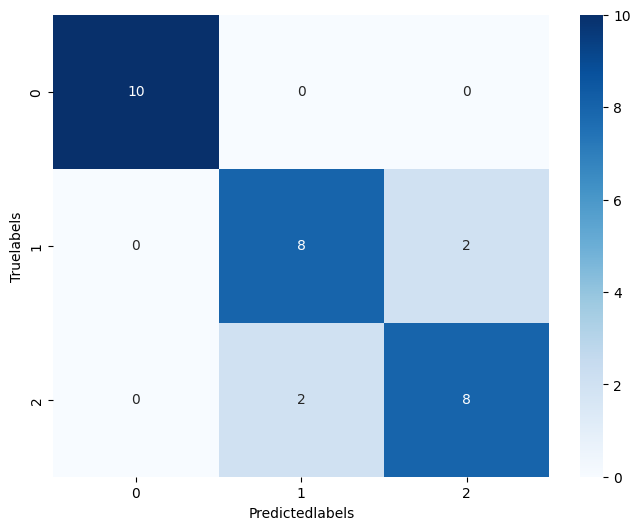

In [12]:
from sklearn import metrics
##利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))
 
##查看混淆矩阵(预测值和真实值的各类情况统计矩阵)
confusion_matrix_result=metrics.confusion_matrix(y_test,test_predict)
print('The confusion matrix result:\n',confusion_matrix_result)
 
## 利用热力图对于结果进行可视化,画混淆矩阵
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predictedlabels')
plt.ylabel('Truelabels')
plt.show()